In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow, imsave
from tqdm import tqdm

In [3]:
def compare_images(im1, im2, c):
    if im1.shape != im2.shape:
        assert "Images shapes are not equal"

    if c =='r':
        c = 0
    elif c == 'g':
        c = 1
    elif c == 'b':
        c = 2
    
    im1 = im1.astype(float)
    im2 = im2.astype(float)

    new_img = np.empty((im1.shape[0], im1.shape[1], 3), dtype=np.uint8)
    unequal_pixels = set()
    for x in tqdm(range(im1.shape[0])):
        for y in range(im1.shape[1]):
            new_img[x][y][c] = np.uint8(np.abs(im1[x][y][c] - im2[x][y][c]))
            if new_img[x][y][c] != 0:
                unequal_pixels.add((x, y, new_img[x][y][c]))
    return new_img, unequal_pixels

In [4]:
def compare_images_rgb(im1, im2):
    if im1.shape != im2.shape:
        assert "Images shapes are not equal"
    
    im1 = im1.astype(float)
    im2 = im2.astype(float)

    new_img = np.empty((im1.shape[0], im1.shape[1], 3), dtype=np.uint8)
    unequal_pixels = set()
    for x in tqdm(range(im1.shape[0])):
        for y in range(im1.shape[1]):
            for c in range(3):
                new_img[x][y][c] = np.uint8(np.abs(im1[x][y][c] - im2[x][y][c]))
    return new_img

In [5]:
def img_diff_mean(img, pixels):
    return len(pixels) / (img.shape[0] * img.shape[1])

def distribution(pixels):
    dist = np.zeros(shape=256)
    for _, _, diff in tqdm(pixels):
        for k in range(256):
            if diff == k:
                dist[k] += 1
    return dist

In [6]:
img_diff_r, pixels_r = compare_images(imread("to_compare/rgb_output/recording00_17.png"), imread("to_compare/rgb_output2/recording00_17.png"), 'r')
img_diff_g, pixels_g = compare_images(imread("to_compare/rgb_output/recording00_17.png"), imread("to_compare/rgb_output2/recording00_17.png"), 'g')
img_diff_b, pixels_b = compare_images(imread("to_compare/rgb_output/recording00_17.png"), imread("to_compare/rgb_output2/recording00_17.png"), 'b')

100%|██████████| 1080/1080 [00:08<00:00, 126.80it/s]


In [29]:
dist = distribution(pixels_r)

100%|██████████| 968155/968155 [04:51<00:00, 3322.26it/s]


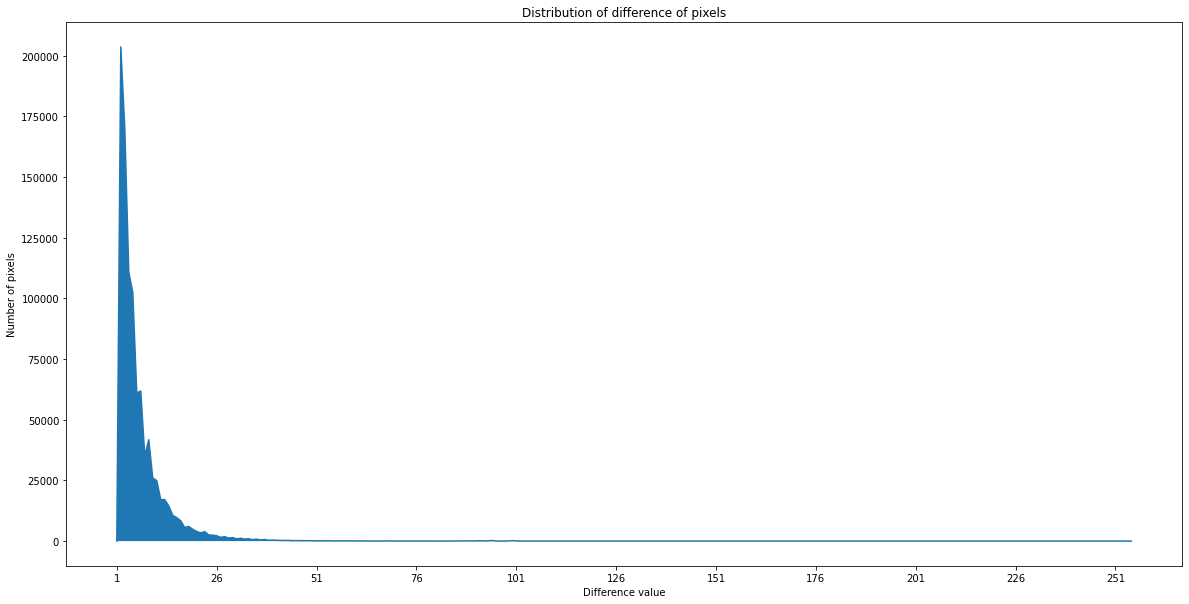

In [90]:
x = np.arange(1, 256)

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()
ax.plot(x, dist[:255])
ax.fill_between(x, dist[:255])
ax.set_xlabel('Difference value')
ax.set_ylabel('Number of pixels')
ax.set_xticks(np.arange(1, 256, 25))
ax.set_title('Distribution of difference of pixels')
plt.savefig("to_compare/rgb_diff/recording00_17_dist.png")

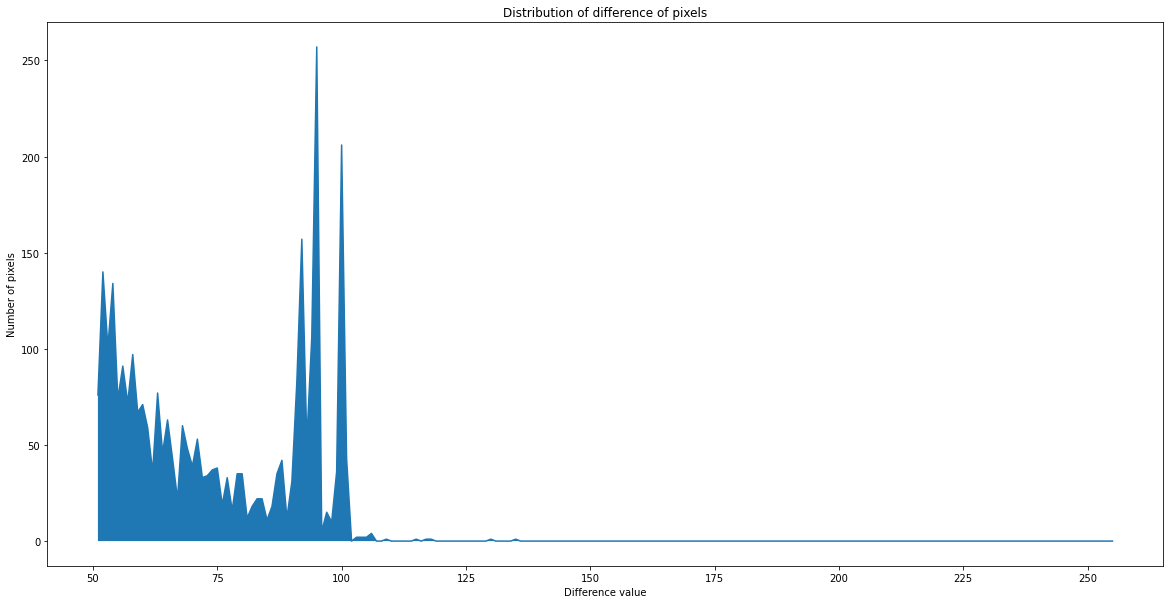

In [89]:
x = np.arange(51, 256)

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()
ax.plot(x, dist[50:255])
ax.fill_between(x, dist[50:255])
ax.set_xlabel('Difference value')
ax.set_ylabel('Number of pixels')
ax.set_title('Distribution of difference of pixels')
#ax.set_xlim(1)
plt.savefig("to_compare/rgb_diff/recording00_17_dist_right.png")

In [7]:
img_diff_r, pixels_r = compare_images(imread("to_compare/rgb_output/recording00_10.png"), imread("to_compare/rgb_output2/recording00_10.png"), 'r')

100%|██████████| 1080/1080 [00:08<00:00, 127.27it/s]


In [8]:
img_diff_mean(img_diff_r, pixels_r)

0.439110725308642

In [10]:
dist = distribution(pixels_r)

100%|██████████| 910540/910540 [04:23<00:00, 3455.75it/s]


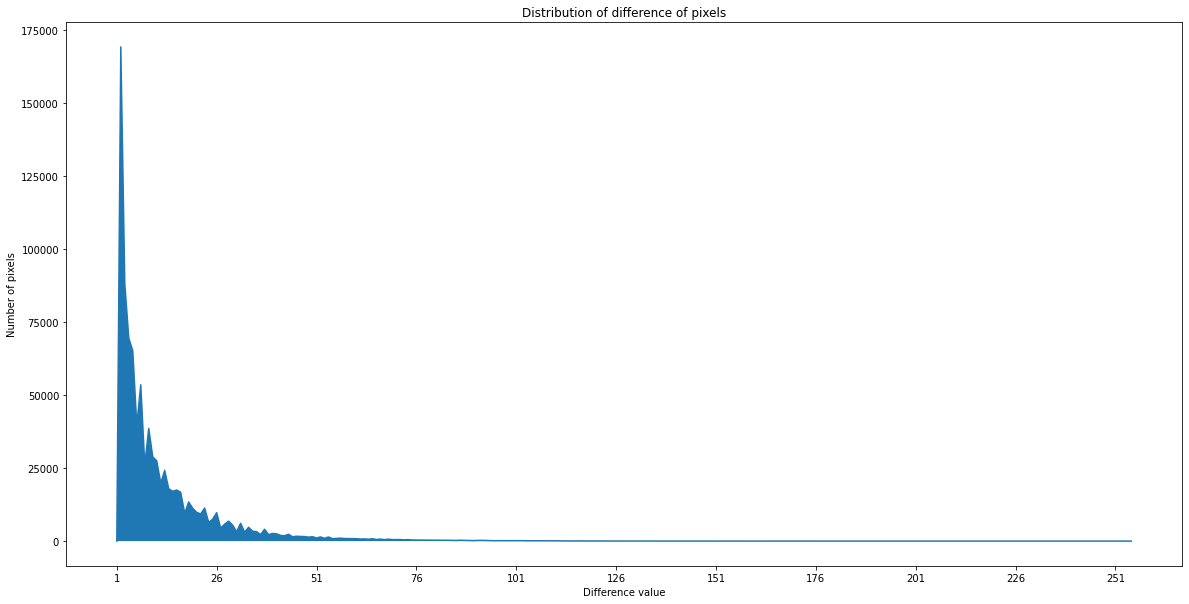

In [11]:
x = np.arange(1, 256)

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()
ax.plot(x, dist[:255])
ax.fill_between(x, dist[:255])
ax.set_xlabel('Difference value')
ax.set_ylabel('Number of pixels')
ax.set_xticks(np.arange(1, 256, 25))
ax.set_title('Distribution of difference of pixels')
plt.savefig("to_compare/rgb_diff/recording00_10_dist.png")

In [6]:
img_diff = compare_images_rgb(imread("to_compare/rgb_output/recording00_17.png"), imread("to_compare/rgb_output2/recording00_17.png"))

100%|██████████| 1080/1080 [00:13<00:00, 78.48it/s]


C:\Python39\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
C:\Users\Appolyon\AppData\Local\Temp/ipykernel_23700/1642150873.py:2: UserWarning: to_compare/rgb_diff/recording00_17.png is a low contrast image
  imsave("to_compare/rgb_diff/recording00_17.png", img_diff)


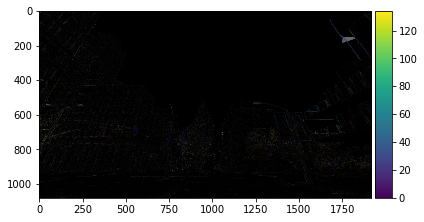

In [7]:
imshow(img_diff)
imsave("to_compare/rgb_diff/recording00_17.png", img_diff)

C:\Users\Appolyon\AppData\Local\Temp/ipykernel_23700/1869698955.py:2: UserWarning: to_compare/rgb_diff/recording00_17_r.png is a low contrast image
  imsave("to_compare/rgb_diff/recording00_17_r.png", img_diff_r)


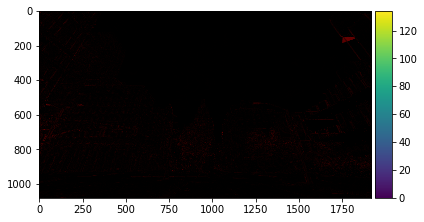

In [8]:
imshow(img_diff_r)
imsave("to_compare/rgb_diff/recording00_17_r.png", img_diff_r)

C:\Users\Appolyon\AppData\Local\Temp/ipykernel_23700/234306114.py:2: UserWarning: to_compare/rgb_diff/recording00_17_g.png is a low contrast image
  imsave("to_compare/rgb_diff/recording00_17_g.png", img_diff_g)


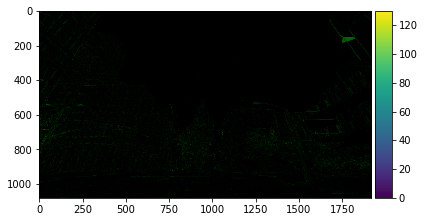

In [9]:
imshow(img_diff_g)
imsave("to_compare/rgb_diff/recording00_17_g.png", img_diff_g)

C:\Users\Appolyon\AppData\Local\Temp/ipykernel_23700/907090211.py:2: UserWarning: to_compare/rgb_diff/recording00_17_b.png is a low contrast image
  imsave("to_compare/rgb_diff/recording00_17_b.png", img_diff_b)


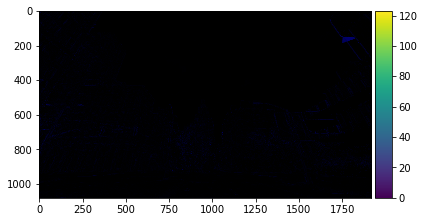

In [10]:
imshow(img_diff_b)
imsave("to_compare/rgb_diff/recording00_17_b.png", img_diff_b)

In [11]:
def rgb_diff(img_name):
    im1 = imread("to_compare/rgb_output/" + img_name)
    im2 = imread("to_compare/rgb_output2/" + img_name)

    diff_image = compare_images_rgb(im1, im2)

    imsave("to_compare/rgb_diff/" + img_name, diff_image)

In [12]:
def sem_diff(img_name):
    im1 = imread("to_compare/sem_output/" + img_name)
    im2 = imread("to_compare/sem_output2/" + img_name)

    diff_image = compare_images_rgb(im1, im2)

    imsave("to_compare/sem_diff/" + img_name, diff_image)

In [13]:
for i in range(1, 11):
    rgb_diff(f"recording00_{i * 10}.png")

100%|██████████| 1080/1080 [00:14<00:00, 75.07it/s]
C:\Users\Appolyon\AppData\Local\Temp/ipykernel_23700/3633816606.py:7: UserWarning: to_compare/rgb_diff/recording00_20.png is a low contrast image
  imsave("to_compare/rgb_diff/" + img_name, diff_image)
100%|██████████| 1080/1080 [00:14<00:00, 76.47it/s]
C:\Users\Appolyon\AppData\Local\Temp/ipykernel_23700/3633816606.py:7: UserWarning: to_compare/rgb_diff/recording00_50.png is a low contrast image
  imsave("to_compare/rgb_diff/" + img_name, diff_image)
100%|██████████| 1080/1080 [00:14<00:00, 75.59it/s]
C:\Users\Appolyon\AppData\Local\Temp/ipykernel_23700/3633816606.py:7: UserWarning: to_compare/rgb_diff/recording00_90.png is a low contrast image
  imsave("to_compare/rgb_diff/" + img_name, diff_image)
100%|██████████| 1080/1080 [00:13<00:00, 77.28it/s]


In [14]:
for i in range(1, 11):
    sem_diff(f"recording00_{(i * 10)}.png")

100%|██████████| 1080/1080 [00:14<00:00, 74.46it/s]
C:\Users\Appolyon\AppData\Local\Temp/ipykernel_23700/1525565872.py:7: UserWarning: to_compare/sem_diff/recording00_2.png is a low contrast image
  imsave("to_compare/sem_diff/" + img_name, diff_image)
100%|██████████| 1080/1080 [00:14<00:00, 75.23it/s]
C:\Users\Appolyon\AppData\Local\Temp/ipykernel_23700/1525565872.py:7: UserWarning: to_compare/sem_diff/recording00_3.png is a low contrast image
  imsave("to_compare/sem_diff/" + img_name, diff_image)
100%|██████████| 1080/1080 [00:13<00:00, 79.80it/s]
